In [1]:
!python --version

Python 3.8.14


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import mediapipe as mp

/var/folders/7b/hcxlcv_s40dgw4f1dlm_w9f40000gn/T/ipykernel_37832/3044551833.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 6


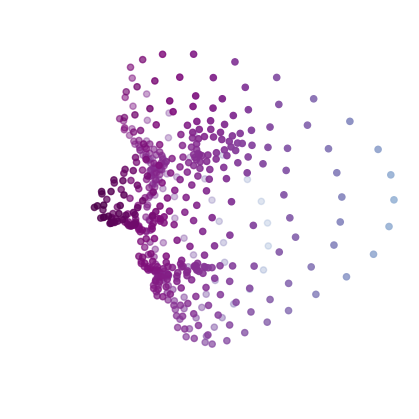

In [4]:
def get_facemesh_coords(landmark_list, img):
    """Extract FaceMesh landmark coordinates into 468x3 NumPy array.
    """
    h, w = img.shape[:2]  # grab width and height from image
    xyz = [(lm.x, lm.y, lm.z) for lm in landmark_list.landmark]

    return np.multiply(xyz, [w, h, w]).astype(int)

image = cv2.imread("africanwface.jpeg")  # read any image containing a face

# Initialize FaceMesh
with mp.solutions.face_mesh.FaceMesh(static_image_mode=True,
                                     refine_landmarks=False,
                                     max_num_faces=1,
                                     min_detection_confidence=0.5
                                     ) as face_mesh:
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

coords = get_facemesh_coords(results.multi_face_landmarks[0], image)

# plot coordinates. Use image's Y coordinate in z direction.
# needs to be inverted as image coordinates start from top.
# color by distance to camera.
fig = plt.figure(figsize=[4, 4])
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.scatter(coords[:, 0], coords[:, 2], -coords[:, 1], c=coords[:, 2],
           cmap="BuPu_r", clip_on=False, vmax=2*coords[:, 2].max())
ax.elev = -5
ax.dist = 6
ax.axis("off")

# make sure equal scale is used across all axes. From Stackoverflow
# https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

max_range = np.array([np.diff(xlim), np.diff(ylim), np.diff(zlim)]).max() / 2.0

mid_x = np.mean(xlim)
mid_y = np.mean(ylim)
mid_z = np.mean(zlim)
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# build animated loop
def rotate_view(frame, azim_delta=1):
    ax.azim = -20 - azim_delta * frame
animation = FuncAnimation(fig, rotate_view, frames=360, interval=15)

writer = PillowWriter(fps=15)
animation.save("facemesh_coordinates.gif", writer=writer, dpi=72)

<img src="africanwface.jpeg" alt="africanwface.jpeg" width="400"/>

<img src="facemesh_coordinates.gif" alt="facemesh" width="400"/>